In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


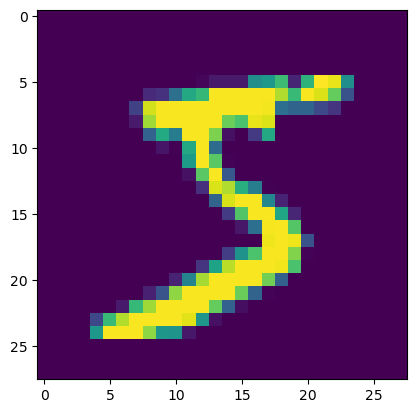

In [5]:
plt.imshow(X_train[0])
print(y_train[0])

1


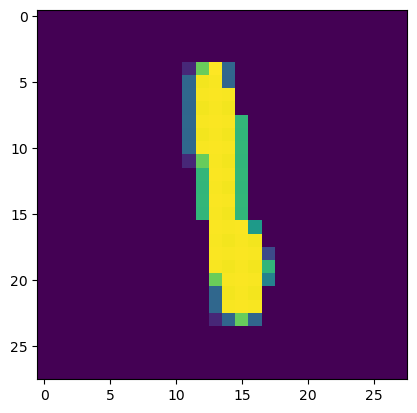

In [6]:
plt.imshow(X_train[200])
print(y_train[200])

7


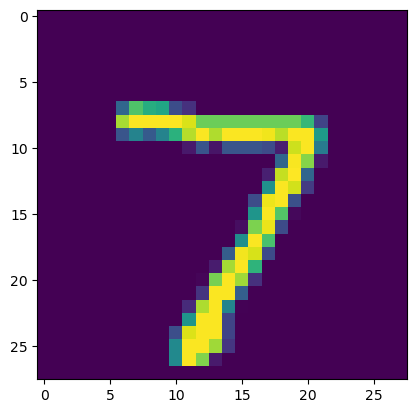

In [7]:
plt.imshow(X_test[0])
print(y_test[0])

In [9]:
#to scale the values

X_train = X_train/255
X_test = X_test/255

In [22]:
model = Sequential()

In [23]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation ='softmax'))

C:\Users\kusha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,batch_size= 64, epochs =20,verbose = 1, validation_split =0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8439 - loss: 0.5500 - val_accuracy: 0.9465 - val_loss: 0.1869
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9510 - loss: 0.1655 - val_accuracy: 0.9607 - val_loss: 0.1352
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9686 - loss: 0.1105 - val_accuracy: 0.9648 - val_loss: 0.1171
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9753 - loss: 0.0865 - val_accuracy: 0.9699 - val_loss: 0.0981
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9803 - loss: 0.0671 - val_accuracy: 0.9722 - val_loss: 0.0929
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9865 - loss: 0.0483 - val_accuracy: 0.9732 - val_loss: 0.0878
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9900 - loss: 0.0391 - val_accuracy: 0.9732 - val_loss: 0.0873
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0341 - val_accuracy: 0.

In [27]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9760 - loss: 0.1004


[0.08916966617107391, 0.9786999821662903]

In [28]:
np.argmax(model.predict(X_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

2


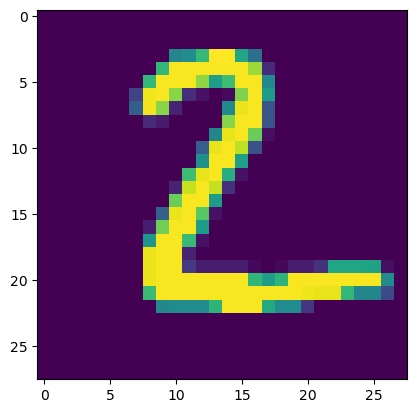

In [29]:
plt.imshow(X_test[1])
print(y_test[1])

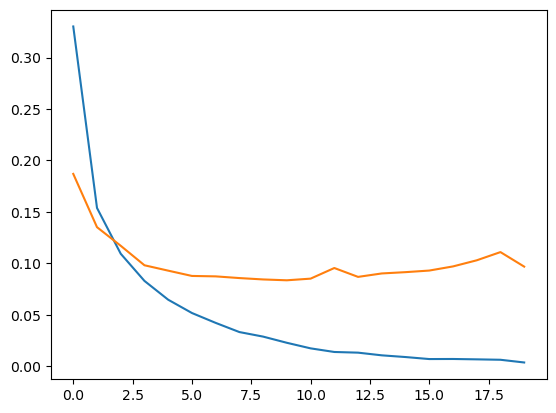

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])